NOTEBOOK 02: EXPLORATORY DATA ANALYSIS & VISUALIZATION


Mục tiêu: Phân tích sâu và trực quan hóa dữ liệu sau preprocessing

1.Import Libraries và Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import pearsonr, spearmanr
import json

# Plotting configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully!")

# Load preprocessed data
df = pd.read_csv('../data/processed/data_normalized.csv')
print(f"✓ Data loaded: {df.shape}")

# Load metadata
with open('../data/processed/metadata.json', 'r') as f:
    metadata = json.load(f)

target_col = metadata['target_column']
print(f"✓ Target variable: {target_col}")

✓ Libraries imported successfully!
✓ Data loaded: (1470, 48)
✓ Target variable: JobSatisfaction


2.Distribution Analysis - Target Variable


Descriptive Statistics:
count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

Distribution Properties:
  Skewness: -0.3297
  Kurtosis: -1.2222
  Range: 3.0000
  IQR: 2.0000

Shapiro-Wilk Test for Normality:
  Statistic: 0.8456
  P-value: 0.0000
  Result: Not normal distribution


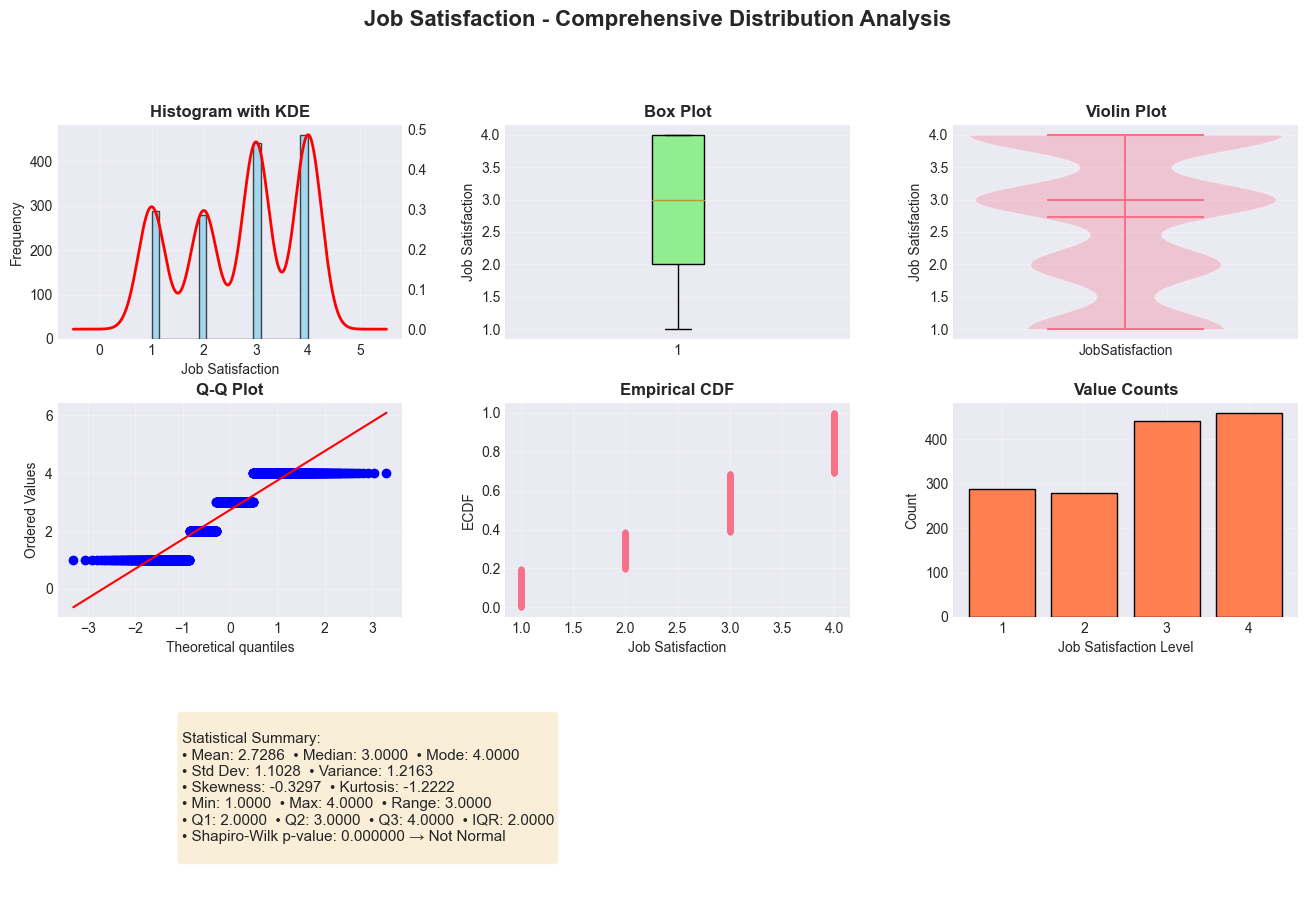


✓ Target distribution analysis saved!


In [2]:
y = df[target_col]

# Statistical tests
print(f"\nDescriptive Statistics:")
print(y.describe())

print(f"\nDistribution Properties:")
print(f"  Skewness: {y.skew():.4f}")
print(f"  Kurtosis: {y.kurtosis():.4f}")
print(f"  Range: {y.max() - y.min():.4f}")
print(f"  IQR: {y.quantile(0.75) - y.quantile(0.25):.4f}")

# Normality test
shapiro_stat, shapiro_p = stats.shapiro(y)
print(f"\nShapiro-Wilk Test for Normality:")
print(f"  Statistic: {shapiro_stat:.4f}")
print(f"  P-value: {shapiro_p:.4f}")
print(f"  Result: {'Normal distribution' if shapiro_p > 0.05 else 'Not normal distribution'}")

# Comprehensive visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Histogram with KDE
ax1 = fig.add_subplot(gs[0, 0])
y.hist(bins=20, ax=ax1, alpha=0.7, color='skyblue', edgecolor='black')
y.plot(kind='kde', ax=ax1, secondary_y=True, color='red', linewidth=2)
ax1.set_title('Histogram with KDE', fontweight='bold')
ax1.set_xlabel('Job Satisfaction')
ax1.set_ylabel('Frequency')
ax1.grid(True, alpha=0.3)

# 2. Box plot
ax2 = fig.add_subplot(gs[0, 1])
bp = ax2.boxplot(y, vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('lightgreen')
ax2.set_title('Box Plot', fontweight='bold')
ax2.set_ylabel('Job Satisfaction')
ax2.grid(True, alpha=0.3)

# 3. Violin plot
ax3 = fig.add_subplot(gs[0, 2])
parts = ax3.violinplot([y], positions=[1], showmeans=True, showmedians=True)
ax3.set_title('Violin Plot', fontweight='bold')
ax3.set_ylabel('Job Satisfaction')
ax3.set_xticks([1])
ax3.set_xticklabels(['JobSatisfaction'])
ax3.grid(True, alpha=0.3)

# 4. Q-Q plot
ax4 = fig.add_subplot(gs[1, 0])
stats.probplot(y, dist="norm", plot=ax4)
ax4.set_title('Q-Q Plot', fontweight='bold')
ax4.grid(True, alpha=0.3)

# 5. ECDF
ax5 = fig.add_subplot(gs[1, 1])
sorted_y = np.sort(y)
cumulative = np.arange(1, len(sorted_y) + 1) / len(sorted_y)
ax5.plot(sorted_y, cumulative, marker='.', linestyle='none')
ax5.set_title('Empirical CDF', fontweight='bold')
ax5.set_xlabel('Job Satisfaction')
ax5.set_ylabel('ECDF')
ax5.grid(True, alpha=0.3)

# 6. Bar chart of counts
ax6 = fig.add_subplot(gs[1, 2])
value_counts = y.value_counts().sort_index()
ax6.bar(value_counts.index, value_counts.values, color='coral', edgecolor='black')
ax6.set_title('Value Counts', fontweight='bold')
ax6.set_xlabel('Job Satisfaction Level')
ax6.set_ylabel('Count')
ax6.grid(True, alpha=0.3)

# 7. Statistics summary
ax7 = fig.add_subplot(gs[2, :])
ax7.axis('off')
stats_text = f"""
Statistical Summary:
• Mean: {y.mean():.4f}  • Median: {y.median():.4f}  • Mode: {y.mode()[0]:.4f}
• Std Dev: {y.std():.4f}  • Variance: {y.var():.4f}
• Skewness: {y.skew():.4f}  • Kurtosis: {y.kurtosis():.4f}
• Min: {y.min():.4f}  • Max: {y.max():.4f}  • Range: {y.max() - y.min():.4f}
• Q1: {y.quantile(0.25):.4f}  • Q2: {y.quantile(0.5):.4f}  • Q3: {y.quantile(0.75):.4f}  • IQR: {y.quantile(0.75) - y.quantile(0.25):.4f}
• Shapiro-Wilk p-value: {shapiro_p:.6f} → {'Normal' if shapiro_p > 0.05 else 'Not Normal'}
"""
ax7.text(0.1, 0.5, stats_text, fontsize=11, verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Job Satisfaction - Comprehensive Distribution Analysis',
             fontsize=16, fontweight='bold', y=0.995)
plt.savefig('../results/figures/eda/target_comprehensive_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Target distribution analysis saved!")

3.Feature Distribution Analysis

Total features: 47


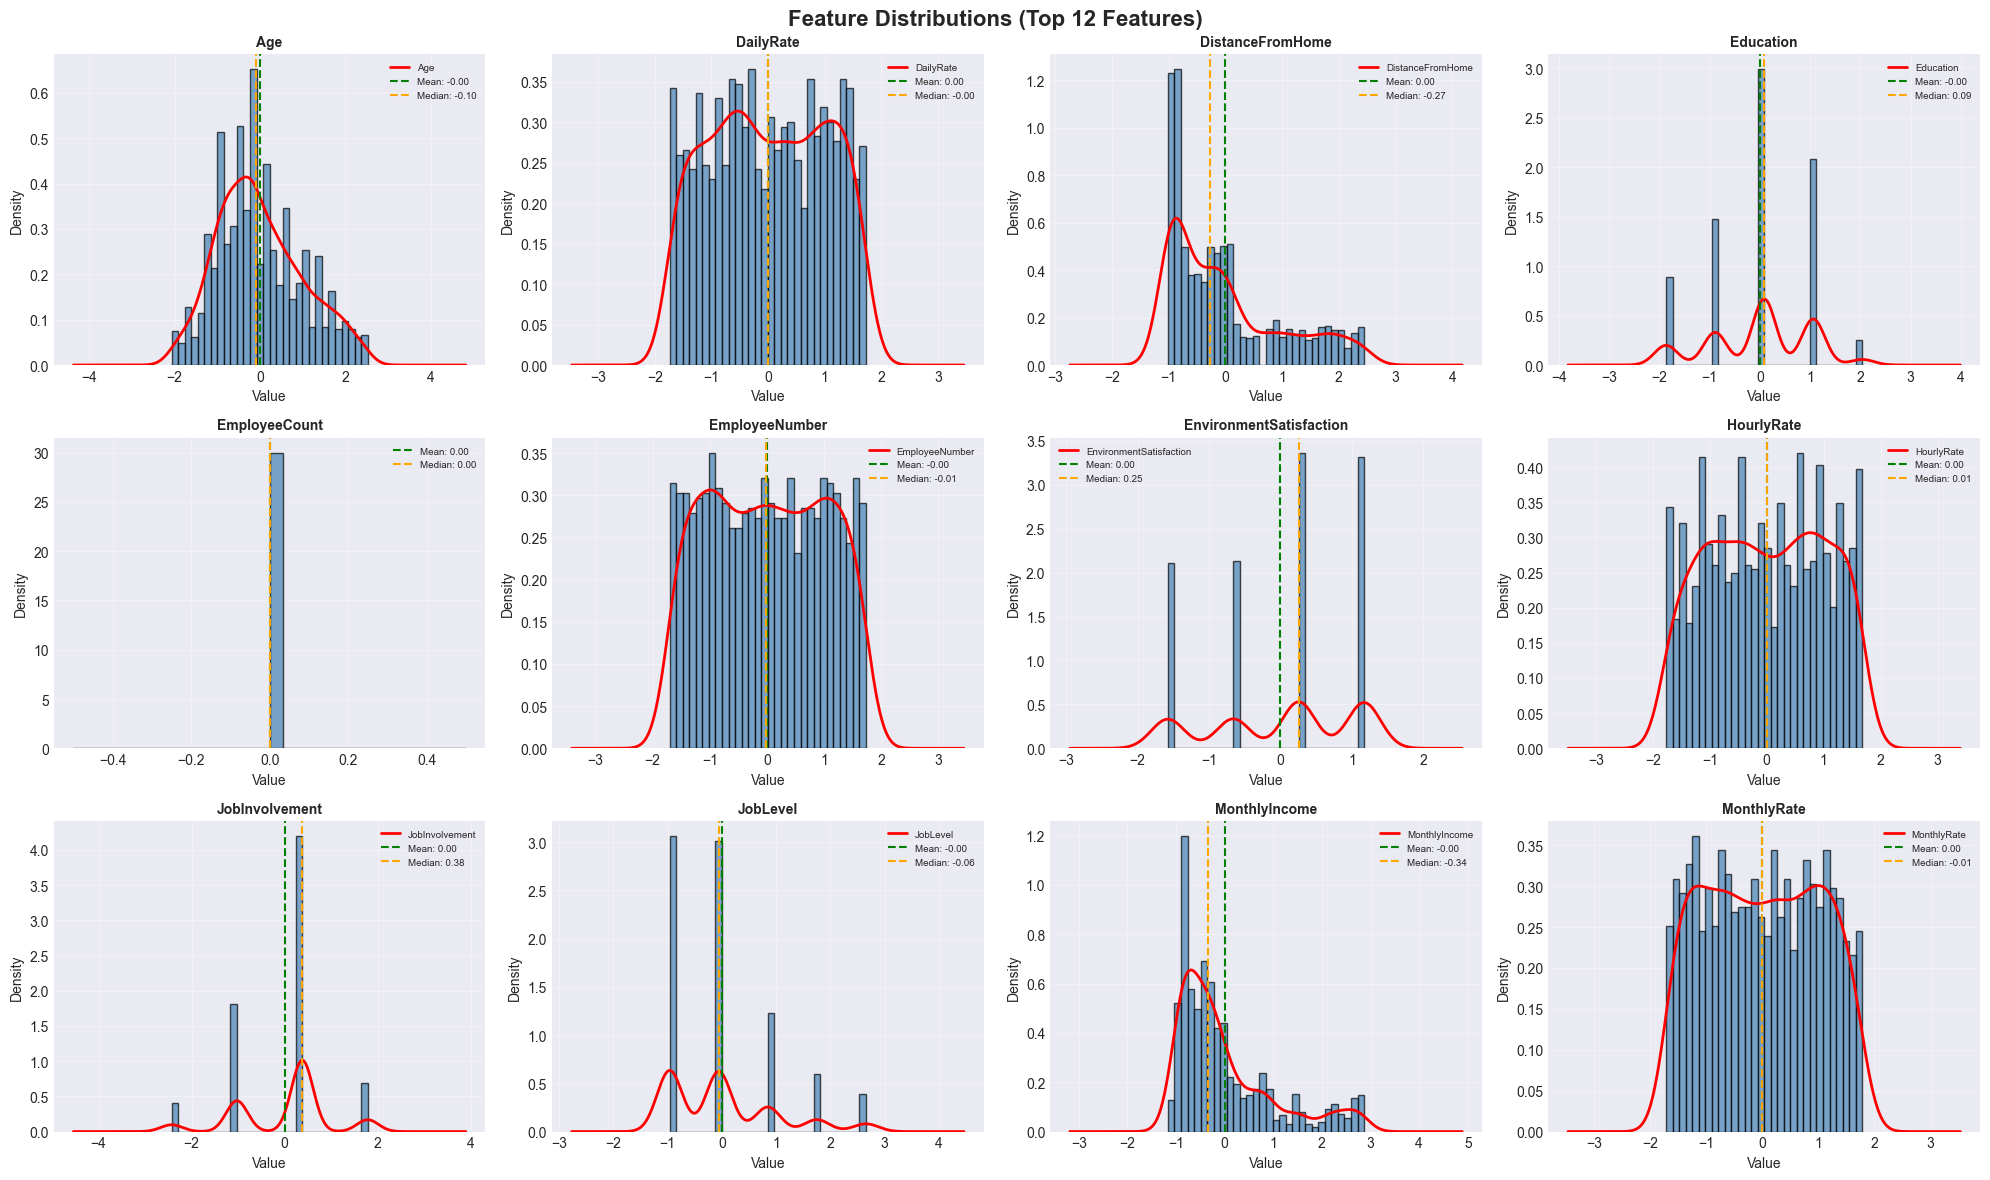

✓ Feature distributions saved!


In [3]:
# Get all features (exclude target)
X = df.drop(target_col, axis=1)
feature_cols = X.columns.tolist()

print(f"Total features: {len(feature_cols)}")

# Analyze distribution of first 12 features
n_features_to_plot = min(12, len(feature_cols))
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.ravel()

for idx in range(n_features_to_plot):
    col = feature_cols[idx]
    data = X[col]

    # Histogram with KDE
    axes[idx].hist(data, bins=30, alpha=0.7, color='steelblue', edgecolor='black', density=True)

    # KDE
    try:
        data.plot(kind='kde', ax=axes[idx], color='red', linewidth=2)
    except:
        pass

    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Density')
    axes[idx].grid(True, alpha=0.3)

    # Add statistics
    axes[idx].axvline(data.mean(), color='green', linestyle='--', linewidth=1.5, label=f'Mean: {data.mean():.2f}')
    axes[idx].axvline(data.median(), color='orange', linestyle='--', linewidth=1.5, label=f'Median: {data.median():.2f}')
    axes[idx].legend(fontsize=7)

plt.suptitle('Feature Distributions (Top 12 Features)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/figures/eda/feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Feature distributions saved!")

4.Correlation Analysis


Top 10 Positive Correlations with JobSatisfaction:
EducationField_Life Sciences        0.052004
Gender_Male                         0.033252
DailyRate                           0.030571
BusinessTravel_Travel_Frequently    0.027117
MaritalStatus_Single                0.024571
OverTime_Yes                        0.024539
JobRole_Research Scientist          0.020503
PercentSalaryHike                   0.020002
Department_Sales                    0.013499
JobRole_Sales Executive             0.012604
Name: JobSatisfaction, dtype: float64

Top 10 Negative Correlations with JobSatisfaction:
EducationField_Marketing       -0.023528
YearsWithCurrManager           -0.027656
JobRole_Human Resources        -0.029681
BusinessTravel_Travel_Rarely   -0.036562
EmployeeNumber                 -0.046247
NumCompaniesWorked             -0.055699
HourlyRate                     -0.071335
Attrition_Yes                  -0.103481
EmployeeCount                        NaN
StandardHours                        Na

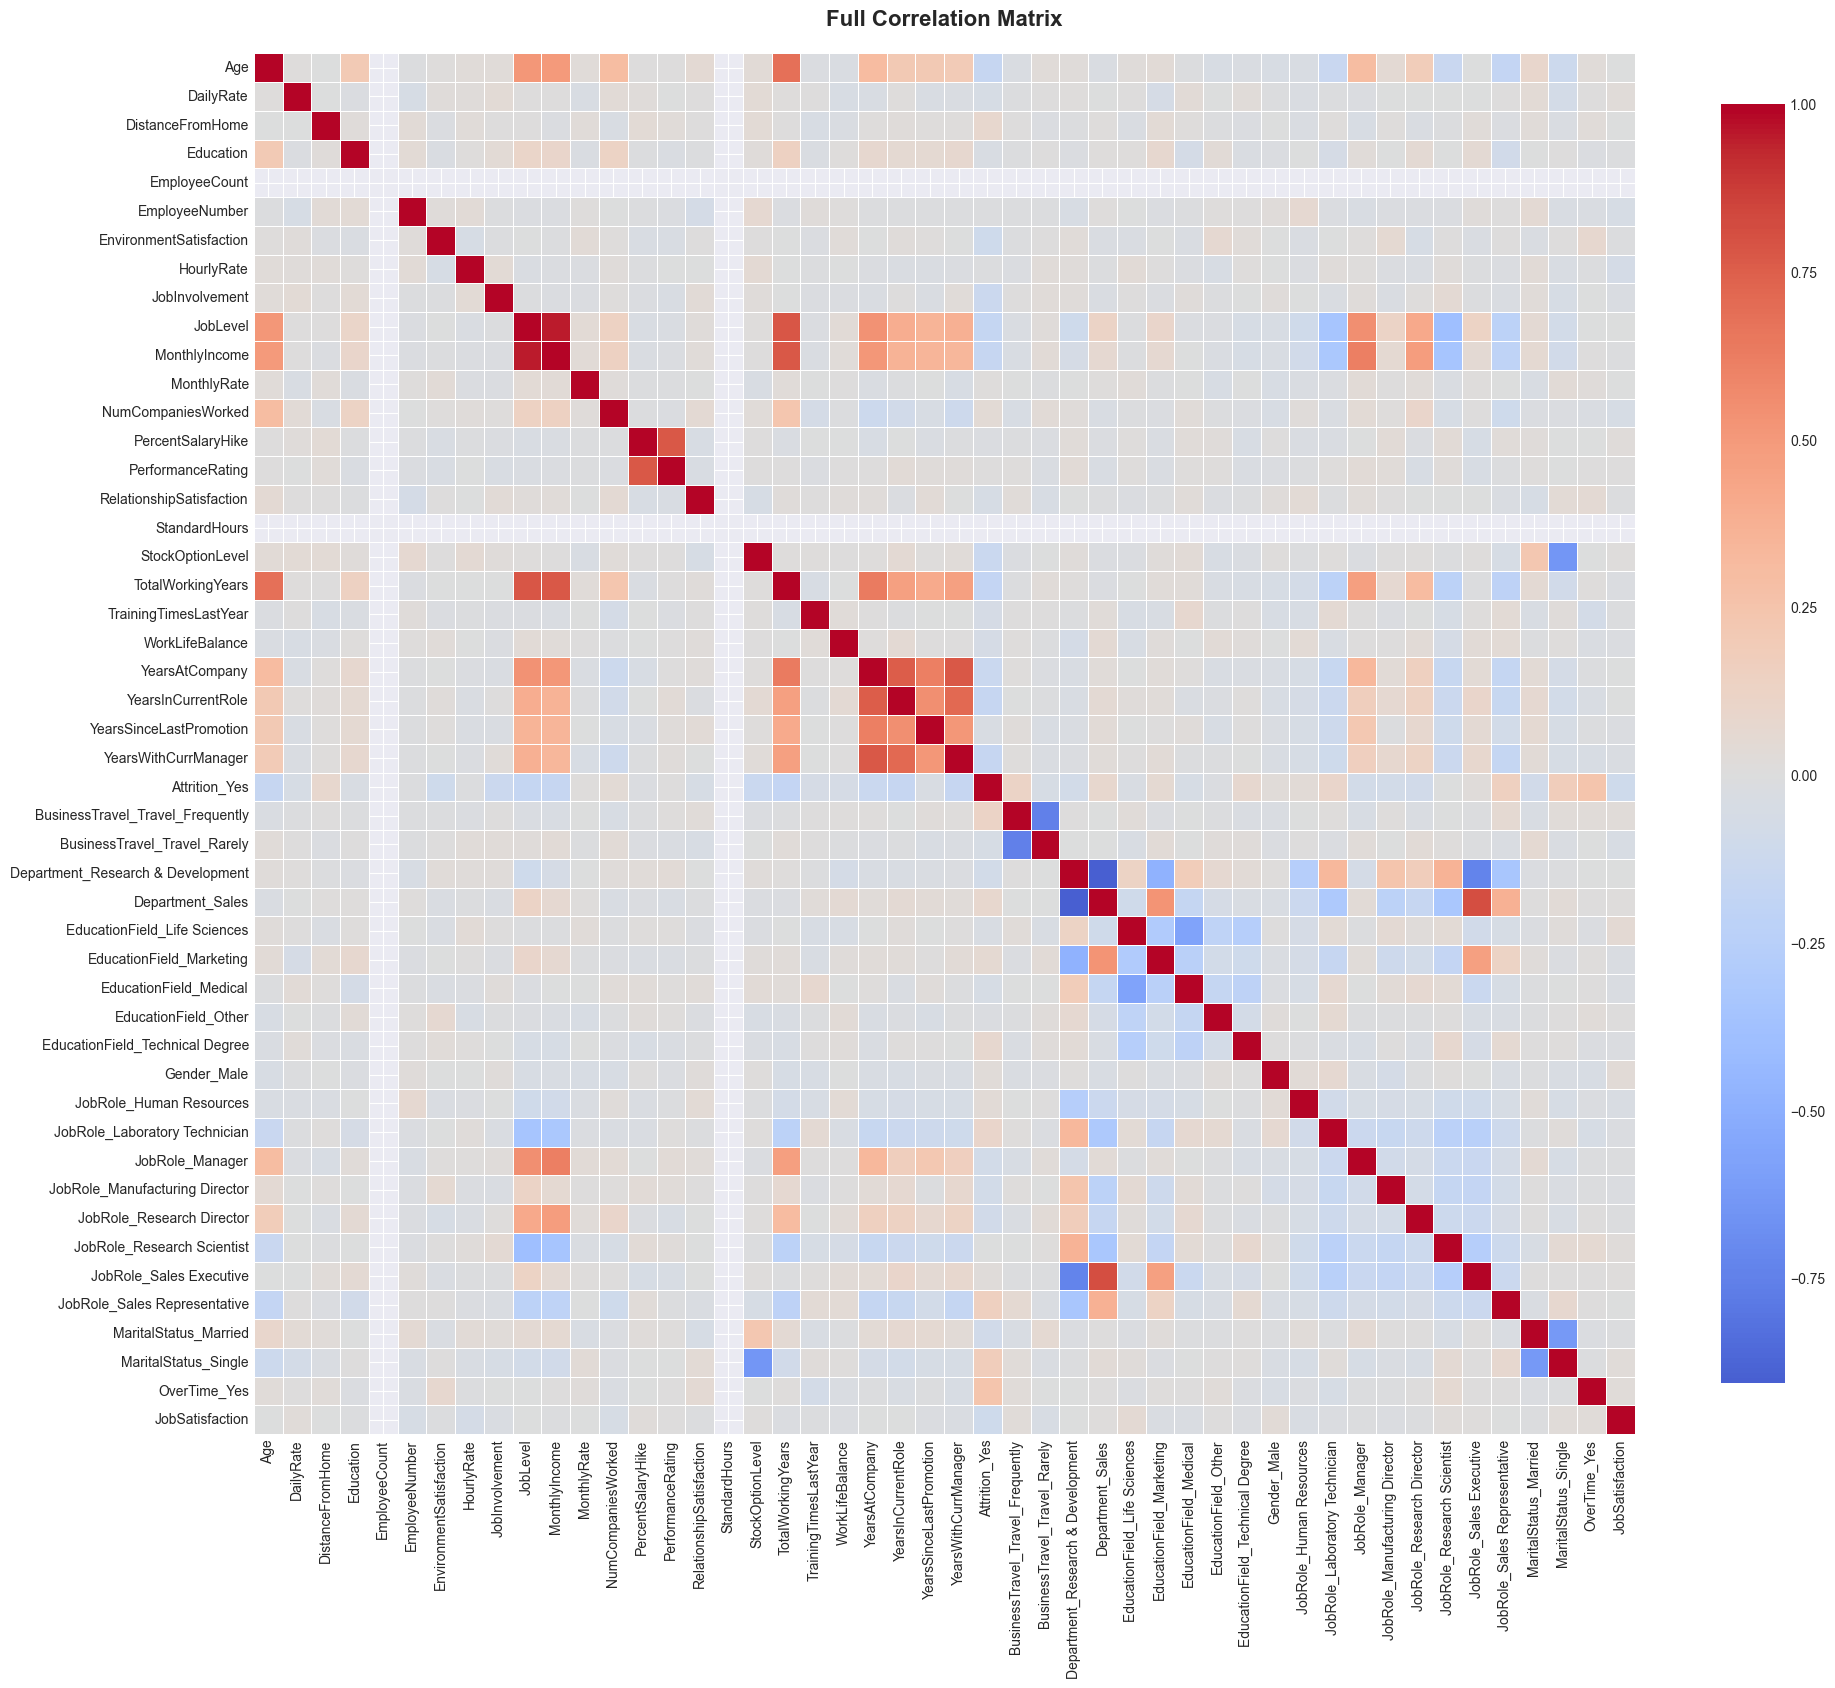

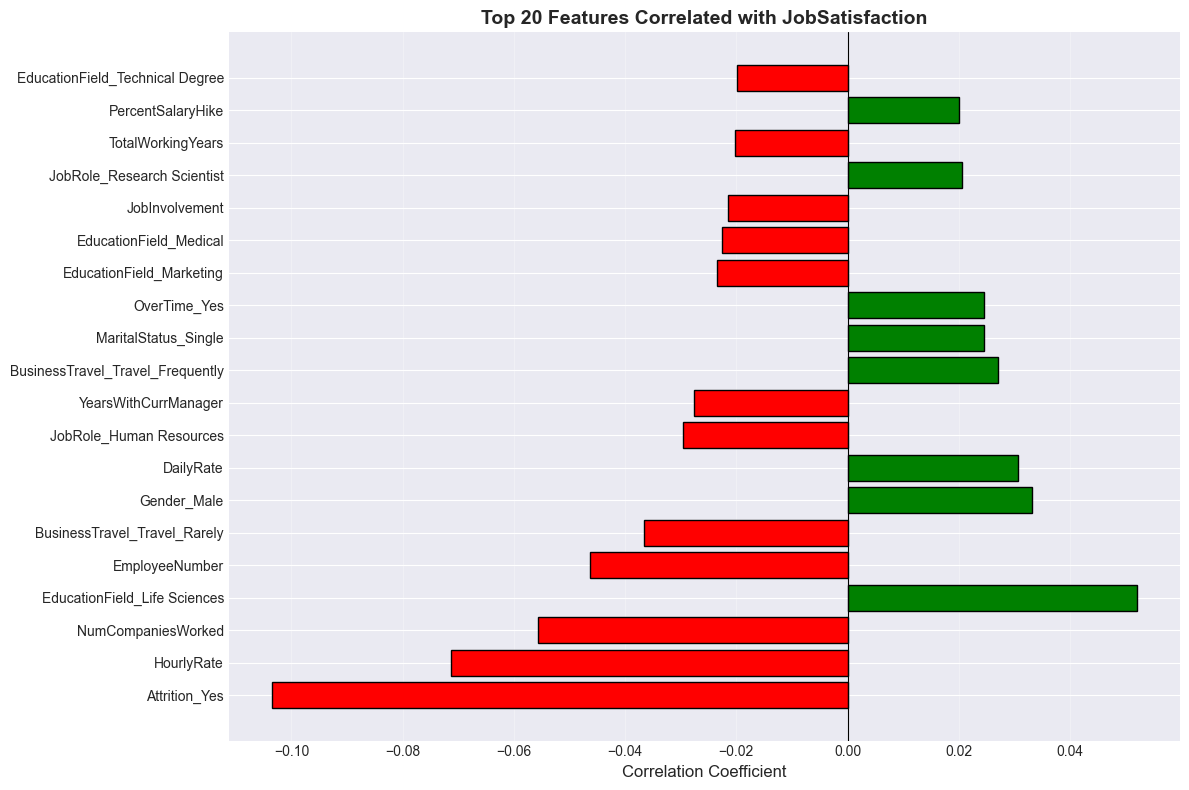


✓ Correlation analysis saved!


In [4]:
# Compute correlation matrix
corr_matrix = df.corr()

# Top correlations with target
target_corr = corr_matrix[target_col].sort_values(ascending=False)
print(f"\nTop 10 Positive Correlations with {target_col}:")
print(target_corr.head(11)[1:])  # Exclude self-correlation

print(f"\nTop 10 Negative Correlations with {target_col}:")
print(target_corr.tail(10))

# Full correlation heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Full Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../results/figures/eda/correlation_matrix_full.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation with target (top 20)
top_features = target_corr.abs().sort_values(ascending=False)[1:21].index
target_corr_subset = corr_matrix.loc[top_features, target_col]

plt.figure(figsize=(12, 8))
colors = ['green' if x > 0 else 'red' for x in target_corr_subset.values]
plt.barh(range(len(target_corr_subset)), target_corr_subset.values, color=colors, edgecolor='black')
plt.yticks(range(len(target_corr_subset)), target_corr_subset.index)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.title(f'Top 20 Features Correlated with {target_col}', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('../results/figures/eda/target_correlation_top20.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Correlation analysis saved!")

5.Pairwise Scatter Plots (Top Features)


Top 5 features for pairplot: ['Attrition_Yes', 'HourlyRate', 'NumCompaniesWorked', 'EducationField_Life Sciences', 'EmployeeNumber']


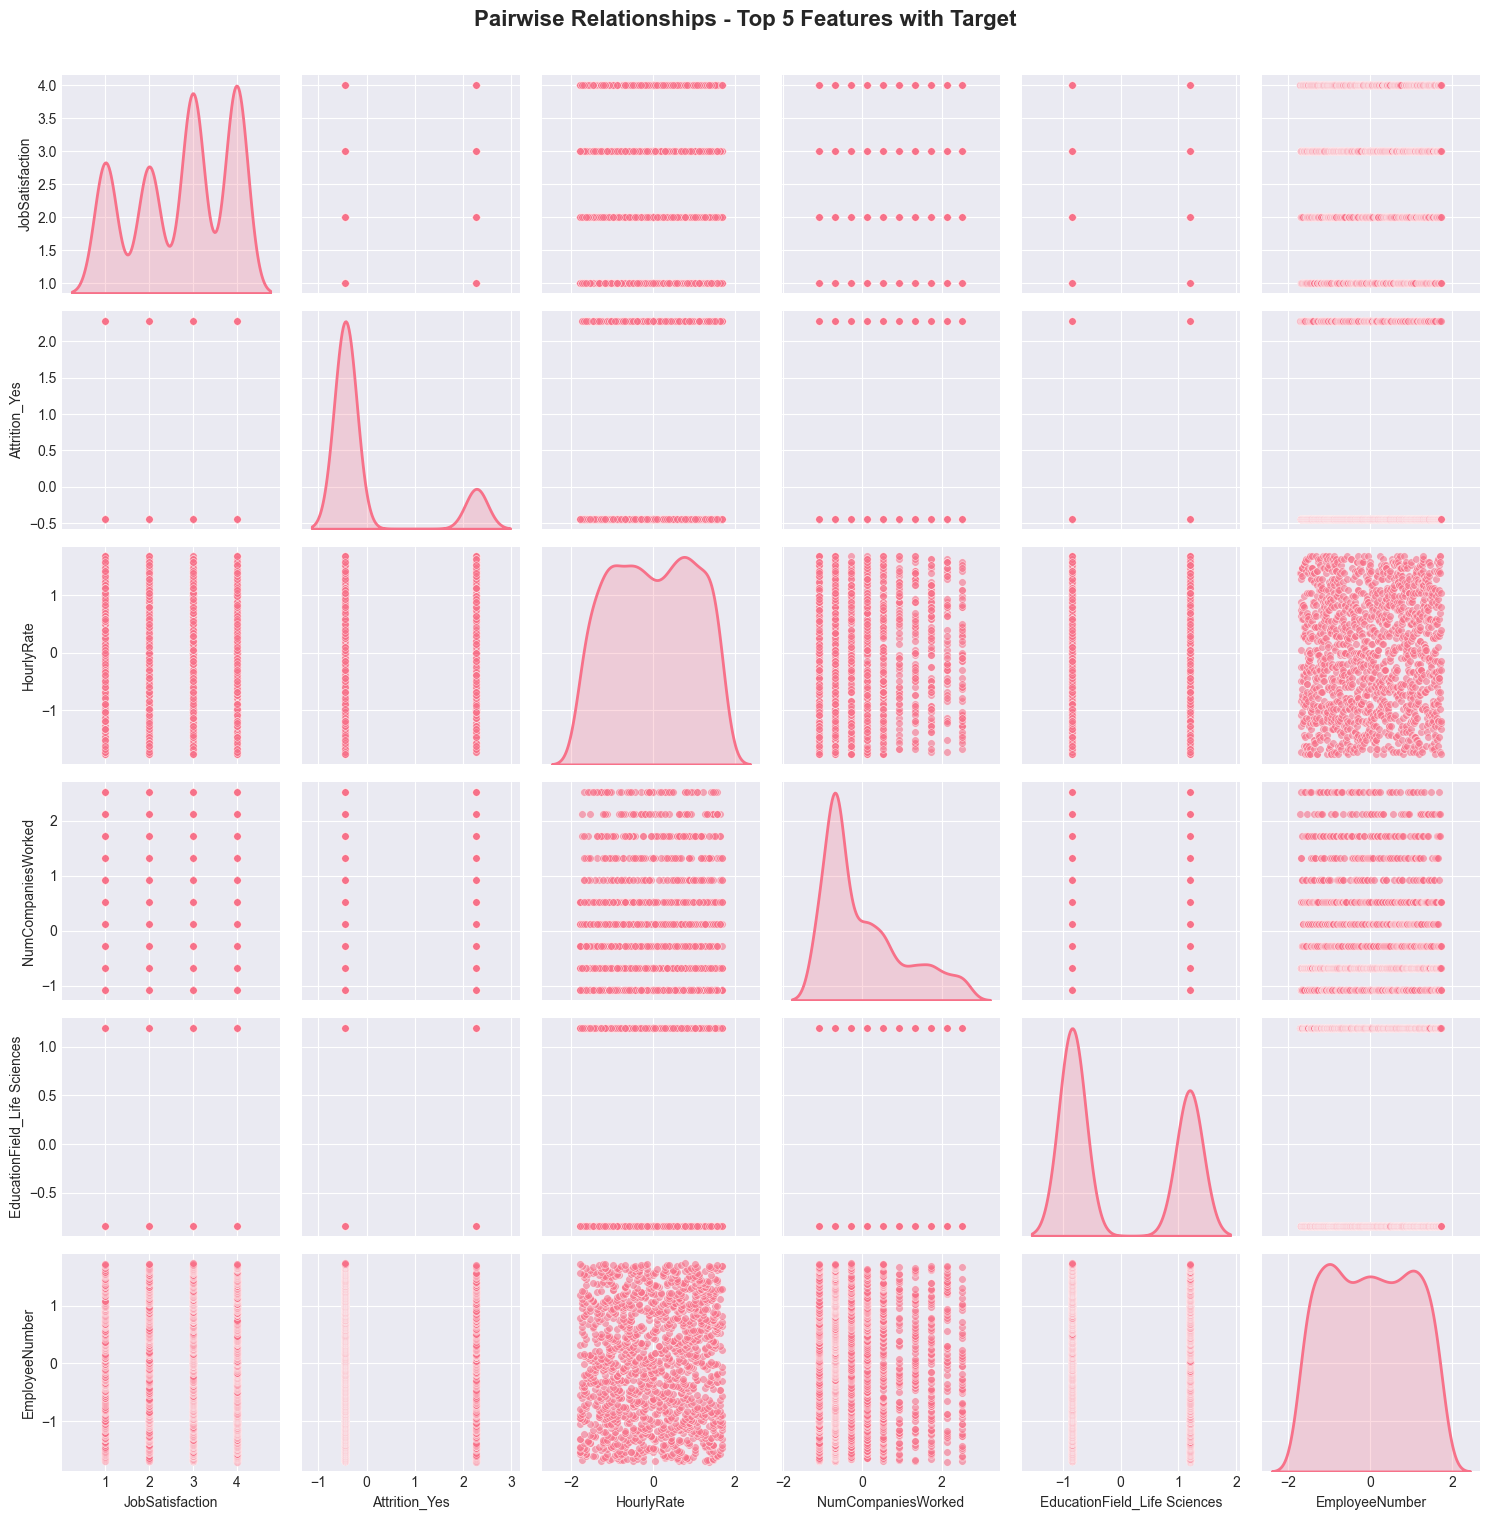

✓ Pairplot saved!


In [5]:
# Select top 5 correlated features
top_5_features = target_corr.abs().sort_values(ascending=False)[1:6].index.tolist()
print(f"\nTop 5 features for pairplot: {top_5_features}")

# Create pairplot data
pairplot_data = df[[target_col] + top_5_features].copy()

# Create pairplot
g = sns.pairplot(pairplot_data, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30},
                 diag_kws={'linewidth': 2})
g.fig.suptitle('Pairwise Relationships - Top 5 Features with Target',
               fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.savefig('../results/figures/eda/pairplot_top_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Pairplot saved!")

6.Scatter Plots with Target

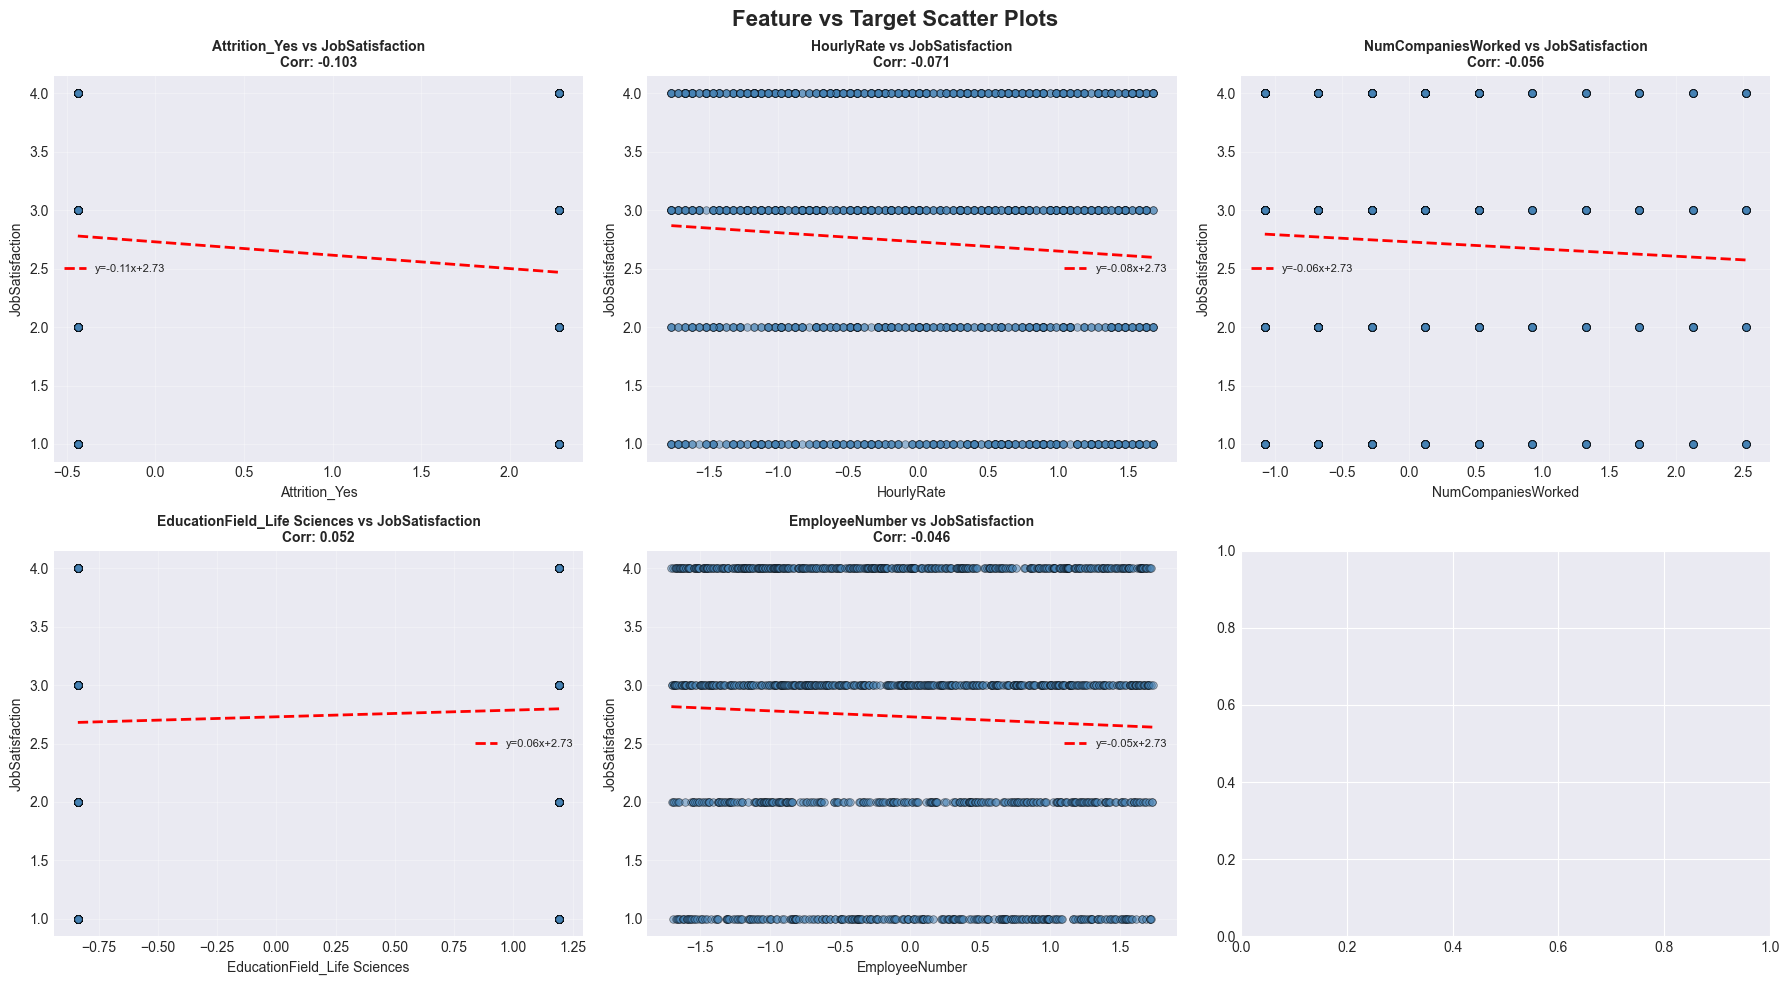

✓ Scatter plots saved!


In [6]:
# Plot top 6 features vs target
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_5_features[:6] if len(top_5_features) >= 6 else top_5_features):
    x_vals = df[feature]
    y_vals = df[target_col]

    # Scatter plot
    axes[idx].scatter(x_vals, y_vals, alpha=0.5, s=30, color='steelblue', edgecolor='black', linewidth=0.5)

    # Fit line
    z = np.polyfit(x_vals, y_vals, 1)
    p = np.poly1d(z)
    axes[idx].plot(x_vals.sort_values(), p(x_vals.sort_values()), "r--", linewidth=2, label=f'y={z[0]:.2f}x+{z[1]:.2f}')

    # Correlation
    corr_val = df[[feature, target_col]].corr().iloc[0, 1]

    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel(target_col, fontsize=10)
    axes[idx].set_title(f'{feature} vs {target_col}\nCorr: {corr_val:.3f}',
                       fontsize=10, fontweight='bold')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Feature vs Target Scatter Plots', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/figures/eda/scatter_features_vs_target.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Scatter plots saved!")

7.Statistical Tests for Correlations

In [7]:
# Test top correlations
correlation_tests = []

for feature in top_5_features:
    # Pearson correlation
    pearson_r, pearson_p = pearsonr(df[feature], df[target_col])

    # Spearman correlation
    spearman_r, spearman_p = spearmanr(df[feature], df[target_col])

    correlation_tests.append({
        'Feature': feature,
        'Pearson r': f'{pearson_r:.4f}',
        'Pearson p-value': f'{pearson_p:.6f}',
        'Spearman r': f'{spearman_r:.4f}',
        'Spearman p-value': f'{spearman_p:.6f}',
        'Significant': 'Yes' if pearson_p < 0.05 else 'No'
    })

corr_test_df = pd.DataFrame(correlation_tests)
print("\nCorrelation Significance Tests:")
print(corr_test_df.to_string(index=False))


Correlation Significance Tests:
                     Feature Pearson r Pearson p-value Spearman r Spearman p-value Significant
               Attrition_Yes   -0.1035        0.000070    -0.1029         0.000077         Yes
                  HourlyRate   -0.0713        0.006216    -0.0683         0.008766         Yes
          NumCompaniesWorked   -0.0557        0.032729    -0.0515         0.048293         Yes
EducationField_Life Sciences    0.0520        0.046204     0.0535         0.040203         Yes
              EmployeeNumber   -0.0462        0.076301    -0.0471         0.070728          No


8.Feature Importance (Random Forest)


Top 20 Most Important Features:
                 Feature  Importance
               DailyRate    0.086908
             MonthlyRate    0.081669
          EmployeeNumber    0.080788
              HourlyRate    0.071156
           MonthlyIncome    0.060984
                     Age    0.053833
        DistanceFromHome    0.053688
       PercentSalaryHike    0.044883
       TotalWorkingYears    0.037355
          YearsAtCompany    0.032098
      NumCompaniesWorked    0.031577
 YearsSinceLastPromotion    0.029653
   TrainingTimesLastYear    0.028670
      YearsInCurrentRole    0.026933
    YearsWithCurrManager    0.026843
               Education    0.023994
 EnvironmentSatisfaction    0.021185
RelationshipSatisfaction    0.019305
         WorkLifeBalance    0.018389
          JobInvolvement    0.016819


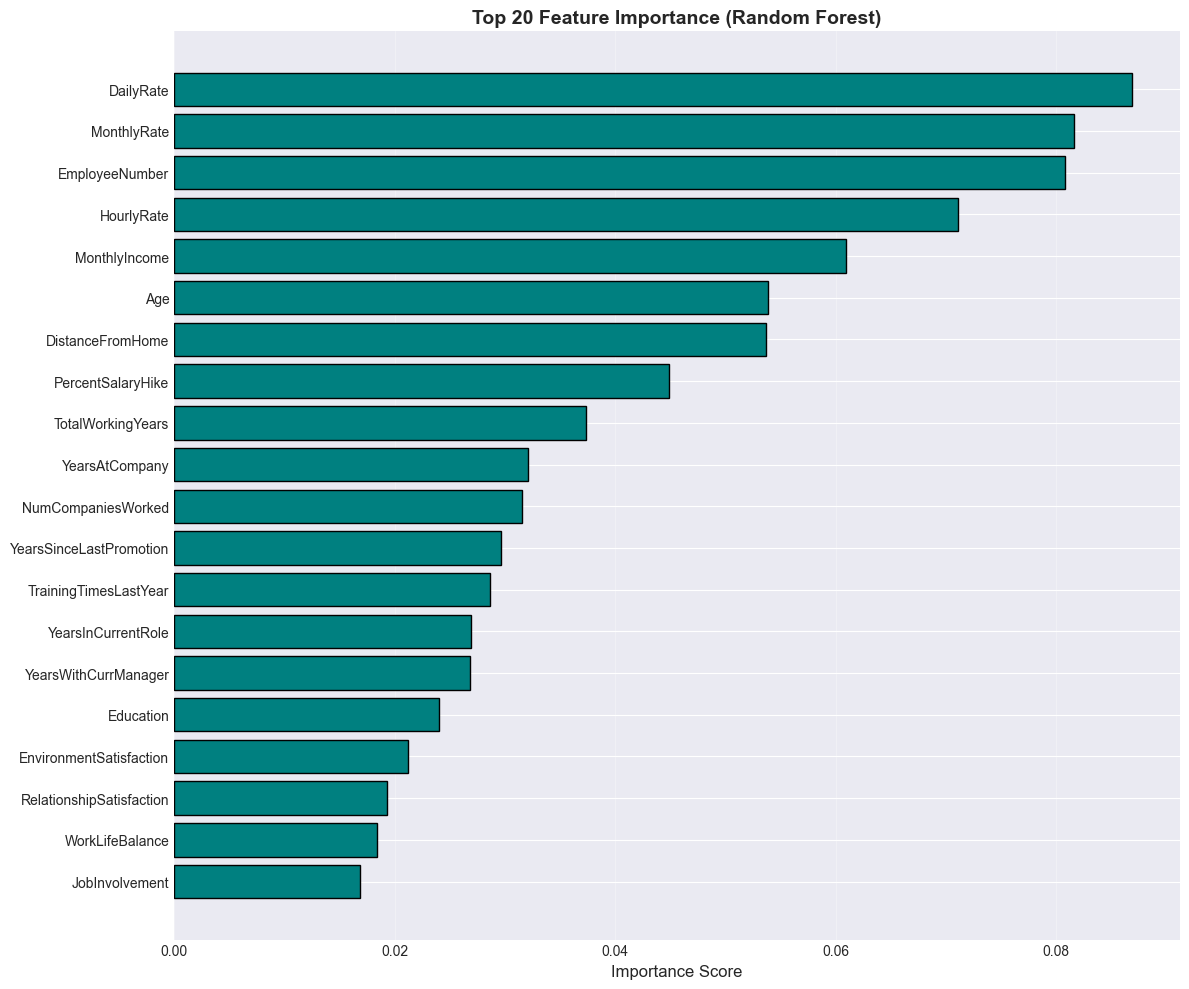


✓ Feature importance saved!


In [8]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 20 Most Important Features:")
print(feature_importance.head(20).to_string(index=False))

# Visualize top 20
plt.figure(figsize=(12, 10))
top_20 = feature_importance.head(20)
plt.barh(range(len(top_20)), top_20['Importance'].values, color='teal', edgecolor='black')
plt.yticks(range(len(top_20)), top_20['Feature'].values)
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 20 Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('../results/figures/eda/feature_importance_rf.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Feature importance saved!")


9.Multicollinearity Analysis


Variance Inflation Factors:
                     Feature      VIF
                  HourlyRate 1.003294
               Attrition_Yes 1.003103
EducationField_Life Sciences 1.002598
          NumCompaniesWorked 1.002436
              EmployeeNumber 1.001354

Interpretation:
  VIF < 5: Low multicollinearity
  5 ≤ VIF < 10: Moderate multicollinearity
  VIF ≥ 10: High multicollinearity (problematic)


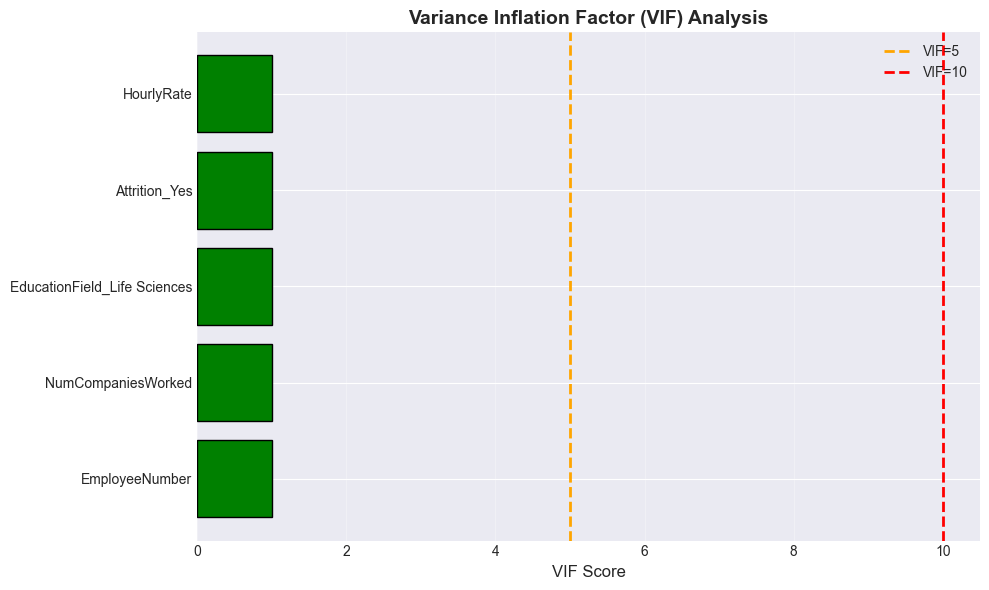


✓ VIF analysis saved!


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample features for VIF (computing VIF for all features can be slow)
sample_features = top_5_features[:10] if len(top_5_features) >= 10 else top_5_features
X_sample = df[sample_features]

# Calculate VIF
vif_data = []
for i, col in enumerate(X_sample.columns):
    try:
        vif = variance_inflation_factor(X_sample.values, i)
        vif_data.append({'Feature': col, 'VIF': vif})
    except:
        vif_data.append({'Feature': col, 'VIF': np.nan})

vif_df = pd.DataFrame(vif_data).sort_values('VIF', ascending=False)

print("\nVariance Inflation Factors:")
print(vif_df.to_string(index=False))
print("\nInterpretation:")
print("  VIF < 5: Low multicollinearity")
print("  5 ≤ VIF < 10: Moderate multicollinearity")
print("  VIF ≥ 10: High multicollinearity (problematic)")

# Visualize VIF
plt.figure(figsize=(10, 6))
colors = ['green' if v < 5 else 'orange' if v < 10 else 'red' for v in vif_df['VIF'].values]
plt.barh(range(len(vif_df)), vif_df['VIF'].values, color=colors, edgecolor='black')
plt.yticks(range(len(vif_df)), vif_df['Feature'].values)
plt.xlabel('VIF Score', fontsize=12)
plt.title('Variance Inflation Factor (VIF) Analysis', fontsize=14, fontweight='bold')
plt.axvline(x=5, color='orange', linestyle='--', linewidth=2, label='VIF=5')
plt.axvline(x=10, color='red', linestyle='--', linewidth=2, label='VIF=10')
plt.legend()
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('../results/figures/eda/vif_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ VIF analysis saved!")

10.Summary Statistics Export

In [11]:
# Comprehensive summary
summary_stats = df.describe(include='all').T
summary_stats['skewness'] = df.skew()
summary_stats['kurtosis'] = df.kurtosis()

# Save to CSV
summary_stats.to_csv('../results/metrics/descriptive_statistics.csv')
print("✓ Saved: descriptive_statistics.csv")

# Save correlations
corr_matrix.to_csv('../results/metrics/correlation_matrix.csv')
print("✓ Saved: correlation_matrix.csv")

# Save feature importance
feature_importance.to_csv('../results/metrics/feature_importance.csv', index=False)
print("✓ Saved: feature_importance.csv")

print("\n" + "="*70)
print("✓ EDA COMPLETE!")
print("="*70)
print("\nKey Findings:")
print(f"1. Target variable ({target_col}) is {'normally' if shapiro_p > 0.05 else 'not normally'} distributed")
print(f"2. Top correlated feature: {target_corr.index[1]} (r={target_corr.iloc[1]:.3f})")
print(f"3. Most important feature: {feature_importance.iloc[0]['Feature']}")
print(f"4. Features with high VIF: {len(vif_df[vif_df['VIF'] > 10])} features")
print("\nNext: Run 03_Dimensionality_Reduction.ipynb")
print("="*70)

✓ Saved: descriptive_statistics.csv
✓ Saved: correlation_matrix.csv
✓ Saved: feature_importance.csv

✓ EDA COMPLETE!

Key Findings:
1. Target variable (JobSatisfaction) is not normally distributed
2. Top correlated feature: EducationField_Life Sciences (r=0.052)
3. Most important feature: DailyRate
4. Features with high VIF: 0 features

Next: Run 03_Dimensionality_Reduction.ipynb
